In [335]:
# Boston Housing Study (Python)
# using data from the Boston Housing Study case
# as described in "Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python" (Miller 2015)

# Here we use data from the Boston Housing Study to evaluate
# regression modeling methods within a cross-validation design.

# program revised by Thomas W. Milller (2017/09/29)

# Scikit Learn documentation for this assignment:
# http://scikit-learn.org/stable/modules/model_evaluation.html 
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.model_selection.KFold.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.LinearRegression.html
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Ridge.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Lasso.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.ElasticNet.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.metrics.r2_score.html

# Textbook reference materials:
# Geron, A. 2017. Hands-On Machine Learning with Scikit-Learn
# and TensorFlow. Sebastopal, Calif.: O'Reilly. Chapter 3 Training Models
# has sections covering linear regression, polynomial regression,
# and regularized linear models. Sample code from the book is 
# available on GitHub at https://github.com/ageron/handson-ml

# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

In [336]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
%matplotlib inline

# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn import preprocessing
import matplotlib.pyplot as plt # static plotting
from sklearn import datasets
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor # ensemble method
from sklearn.ensemble import GradientBoostingRegressor # ensemble method
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation
matplotlib.style.use('ggplot')

In [337]:
# read data for the Boston Housing Study
# creating data frame restdata
boston1 = pd.read_csv('boston.csv')
boston1.head()

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [338]:
boston1.tail()

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
501,Winthrop,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,Winthrop,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,Winthrop,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,Winthrop,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,Winthrop,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,19.0


In [339]:
# Check available columns
boston1.columns

Index(['neighborhood', 'crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 'age',
       'dis', 'rad', 'tax', 'ptratio', 'lstat', 'mv'],
      dtype='object')

In [340]:
# Check column information and there is no blank cell and type of columns revealed
boston1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
neighborhood    506 non-null object
crim            506 non-null float64
zn              506 non-null float64
indus           506 non-null float64
chas            506 non-null int64
nox             506 non-null float64
rooms           506 non-null float64
age             506 non-null float64
dis             506 non-null float64
rad             506 non-null int64
tax             506 non-null int64
ptratio         506 non-null float64
lstat           506 non-null float64
mv              506 non-null float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.4+ KB


In [341]:
# convert certain int variables to float
boston1.chas = pd.to_numeric(boston1.chas, downcast='float')
boston1.rad  = pd.to_numeric(boston1.rad,  downcast='float')
boston1.tax  = pd.to_numeric(boston1.tax,  downcast='float')

In [342]:
# drop neighborhood from the data being considered
boston1['log_mv'] = np.log(boston1.mv)
boston2 = boston1.drop('neighborhood', axis = 1)
print('\nGeneral description of the boston DataFrame:')
print(boston2.info())


General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null float32
nox        506 non-null float64
rooms      506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null float32
tax        506 non-null float32
ptratio    506 non-null float64
lstat      506 non-null float64
mv         506 non-null float64
log_mv     506 non-null float64
dtypes: float32(3), float64(11)
memory usage: 49.5 KB
None


In [343]:
boston2.head()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv,log_mv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,3.178054
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,3.072693
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,3.546740
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,3.508556
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,3.589059


In [344]:
# Check numerical variables simple statistics
print('\nDescriptive statistics of the boston DataFrame:')
print(boston2.describe())


Descriptive statistics of the boston DataFrame:
             crim          zn       indus        chas         nox       rooms  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253993    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237152   18.

In [345]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

<Figure size 432x288 with 0 Axes>

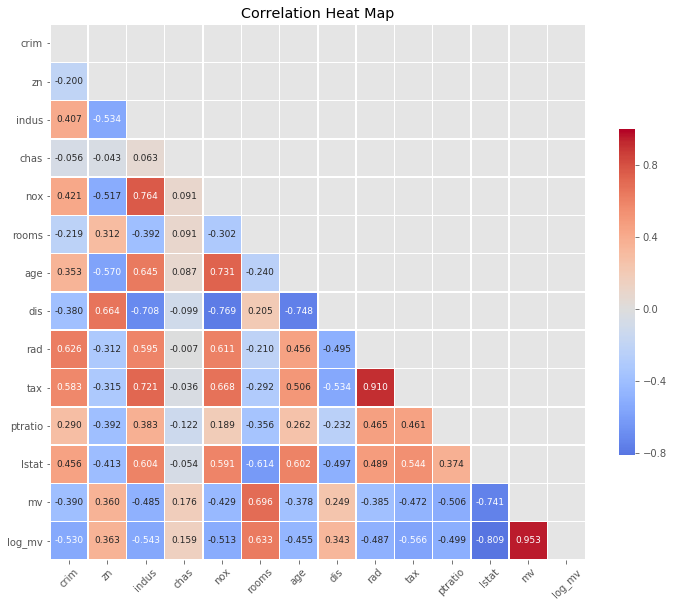

In [346]:
# examine intercorrelations among three predictors and one target variables 
# with correlation matrix/heat map
corr_chart(df_corr = boston2)

In [347]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value which is response variable
# the remaining columns are the explanatory/predicting variables
prelim_model_data1 = np.array([boston2.mv,\
    boston2.crim,\
    boston2.zn,\
    boston2.indus,\
    boston2.chas,\
    boston2.nox,\
    boston2.rooms,\
    boston2.age,\
    boston2.dis,\
    boston2.rad,\
    boston2.tax,\
    boston2.ptratio,\
    boston2.lstat]).T

In [348]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value which is response variable
# the remaining columns are the explanatory/predicting variables
prelim_model_data2 = np.array([boston2.log_mv,\
    boston2.crim,\
    boston2.zn,\
    boston2.indus,\
    boston2.chas,\
    boston2.nox,\
    boston2.rooms,\
    boston2.age,\
    boston2.dis,\
    boston2.rad,\
    boston2.tax,\
    boston2.ptratio,\
    boston2.lstat]).T

In [349]:
# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions for prelim_model_data1:', prelim_model_data1.shape)
print('\nData dimensions for prelim_model_data2:', prelim_model_data2.shape)


Data dimensions for prelim_model_data1: (506, 13)

Data dimensions for prelim_model_data2: (506, 13)


In [350]:
# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler2 = StandardScaler()
print(scaler1.fit(prelim_model_data1))
print(scaler2.fit(prelim_model_data2))
# show standardization constants being employed
print("\nUsing MV as response variable and scale variables")
print(scaler1.mean_)
print(scaler1.scale_)
print("\n******************************************************************************************")
print("Using Log(MV) as response variable and scale variables")
print(scaler2.mean_)
print(scaler2.scale_)


StandardScaler(copy=True, with_mean=True, with_std=True)
StandardScaler(copy=True, with_mean=True, with_std=True)

Using MV as response variable and scale variables
[2.253e+01 3.614e+00 1.136e+01 1.114e+01 6.917e-02 5.547e-01 6.285e+00
 6.857e+01 3.795e+00 9.549e+00 4.082e+02 1.846e+01 1.265e+01]
[9.173e+00 8.593e+00 2.330e+01 6.854e+00 2.537e-01 1.158e-01 7.019e-01
 2.812e+01 2.104e+00 8.699e+00 1.684e+02 2.163e+00 7.134e+00]

******************************************************************************************
Using Log(MV) as response variable and scale variables
[3.035e+00 3.614e+00 1.136e+01 1.114e+01 6.917e-02 5.547e-01 6.285e+00
 6.857e+01 3.795e+00 9.549e+00 4.082e+02 1.846e+01 1.265e+01]
[4.079e-01 8.593e+00 2.330e+01 6.854e+00 2.537e-01 1.158e-01 7.019e-01
 2.812e+01 2.104e+00 8.699e+00 1.684e+02 2.163e+00 7.134e+00]


# First model is built based on MV as response variable

In [351]:
# the model data will be standardized form of preliminary model data
model_data = scaler1.fit_transform(prelim_model_data1)
model_data

array([[ 0.16 , -0.42 ,  0.285, ..., -0.667, -1.459, -1.076],
       [-0.101, -0.417, -0.488, ..., -0.987, -0.303, -0.492],
       [ 1.327, -0.417, -0.488, ..., -0.987, -0.303, -1.209],
       ...,
       [ 0.149, -0.413, -0.488, ..., -0.803,  1.176, -0.983],
       [-0.058, -0.408, -0.488, ..., -0.803,  1.176, -0.865],
       [-0.385, -0.415, -0.488, ..., -0.803,  1.176, -0.669]])

In [352]:
# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


Dimensions for model_data: (506, 13)


In [353]:
# these methods may have failed due to the small sample size 
# for boston housing market case
names = ['Linear_Regression', 'Ridge_Regression', 'Lasso_Regression', 'ElasticNet_Regression'] 

regressors = [LinearRegression(fit_intercept = SET_FIT_INTERCEPT), 
              Ridge(alpha = 1, solver = 'cholesky', 
                     fit_intercept = SET_FIT_INTERCEPT, 
                     normalize = False, 
                     random_state = RANDOM_SEED),
              Lasso(alpha = 0.1, max_iter=10000, tol=0.01, 
                     fit_intercept = SET_FIT_INTERCEPT, 
                     random_state = RANDOM_SEED),
              ElasticNet(alpha = 0.1, l1_ratio = 0.5, 
                          max_iter=10000, tol=0.01, 
                          fit_intercept = SET_FIT_INTERCEPT, 
                          normalize = False, 
                          random_state = RANDOM_SEED)]

# specify the k-fold cross-validation design
# k fold is the time of iteration for regression
from sklearn.model_selection import KFold

# ten-fold cross-validation employed here
# As an alternative to 10-fold cross-validation
N_FOLDS = 10

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)
# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   the structure of modeling data for this study has the
#   response variable coming first and explanatory variables later          
#   so 1:model_data.shape[1] slices for explanatory variables
#   and 0 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)
    
    index_for_method = 0  # initialize
    for name, reg_model in zip(names, regressors):
        print('\nRegression model evaluation for:', name)
        print('  Scikit Learn method:', reg_model)
        reg_model.fit(X_train, y_train)  # fit on the train set for this fold
        print('Fitted regression intercept:', reg_model.intercept_)
        print('Fitted regression coefficients:', reg_model.coef_)
 
        # evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        print('Coefficient of determination (R-squared):',
              r2_score(y_test, y_test_predict))
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        print(reg_model.get_params(deep=True))
        print('Root mean-squared error:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names


Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Fitted regression intercept: -0.005032049293645792
Fitted regression coefficients: [-0.111  0.136  0.014  0.079 -0.238  0.268  0.007 -0.371  0.27  -0.232
 -0.215 -0.455]
Coefficient of determination (R-squared): 0.7650752349379009
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Root mean-squared error: 0.3080338355432656

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='cholesky', tol=0.001)
Fitted regression intercept: -0.004773620761079199
Fitted regression coefficients: [-

Fitted regression intercept: -0.004046984711110188
Fitted regression coefficients: [-0.106  0.129  0.01   0.076 -0.223  0.281  0.04  -0.333  0.313 -0.296
 -0.205 -0.45 ]
Coefficient of determination (R-squared): 0.48862051999665634
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 1, 'solver': 'cholesky', 'tol': 0.001}
Root mean-squared error: 0.32971789972238946

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.01, warm_start=False)
Fitted regression intercept: 0.006583390749236792
Fitted regression coefficients: [-0.003  0.    -0.     0.016 -0.     0.307 -0.    -0.    -0.    -0.
 -0.145 -0.406]
Coefficient of determination (R-squared): 0.5598113511807492
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10000, 'normalize': Fals

In [354]:
print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Root mean-squared error', sep = '')     
print(cv_results_df.mean())   


----------------------------------------------
Average results from 10-fold cross-validation
in standardized units (mean 0, standard deviation 1)

Method               Root mean-squared error
Linear_Regression        0.561940
Ridge_Regression         0.560511
Lasso_Regression         0.587381
ElasticNet_Regression    0.568084
dtype: float64


# Second Model is build based on Log(MV) as reponse variable

In [355]:
# the model data will be standardized form of preliminary model data
model_data = scaler2.fit_transform(prelim_model_data2)
model_data

array([[ 0.352, -0.42 ,  0.285, ..., -0.667, -1.459, -1.076],
       [ 0.093, -0.417, -0.488, ..., -0.987, -0.303, -0.492],
       [ 1.256, -0.417, -0.488, ..., -0.987, -0.303, -1.209],
       ...,
       [ 0.342, -0.413, -0.488, ..., -0.803,  1.176, -0.983],
       [ 0.138, -0.408, -0.488, ..., -0.803,  1.176, -0.865],
       [-0.221, -0.415, -0.488, ..., -0.803,  1.176, -0.669]])

In [356]:
# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


Dimensions for model_data: (506, 13)


In [357]:
# these methods may have failed due to the small sample size 
# for boston housing market case
names = ['Linear_Regression', 'Ridge_Regression', 'Lasso_Regression', 'ElasticNet_Regression'] 

regressors = [LinearRegression(fit_intercept = SET_FIT_INTERCEPT), 
              Ridge(alpha = 1, solver = 'cholesky', 
                     fit_intercept = SET_FIT_INTERCEPT, 
                     normalize = False, 
                     random_state = RANDOM_SEED),
              Lasso(alpha = 0.1, max_iter=10000, tol=0.01, 
                     fit_intercept = SET_FIT_INTERCEPT, 
                     random_state = RANDOM_SEED),
              ElasticNet(alpha = 0.1, l1_ratio = 0.5, 
                          max_iter=10000, tol=0.01, 
                          fit_intercept = SET_FIT_INTERCEPT, 
                          normalize = False, 
                          random_state = RANDOM_SEED)]

# specify the k-fold cross-validation design
# k fold is the time of iteration for regression
from sklearn.model_selection import KFold

# ten-fold cross-validation employed here
# As an alternative to 10-fold cross-validation
N_FOLDS = 10

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)
# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   the structure of modeling data for this study has the
#   response variable coming first and explanatory variables later          
#   so 1:model_data.shape[1] slices for explanatory variables
#   and 0 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)
    
    index_for_method = 0  # initialize
    for name, reg_model in zip(names, regressors):
        print('\nRegression model evaluation for:', name)
        print('  Scikit Learn method:', reg_model)
        reg_model.fit(X_train, y_train)  # fit on the train set for this fold
        print('Fitted regression intercept:', reg_model.intercept_)
        print('Fitted regression coefficients:', reg_model.coef_)
 
        # evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        print('Coefficient of determination (R-squared):',
              r2_score(y_test, y_test_predict))
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        print(reg_model.get_params(deep=True))
        print('Root mean-squared error:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names


Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Fitted regression intercept: 0.0016135906928882136
Fitted regression coefficients: [-0.225  0.081  0.031  0.067 -0.228  0.131  0.026 -0.281  0.275 -0.268
 -0.179 -0.555]
Coefficient of determination (R-squared): 0.7955897104349217
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Root mean-squared error: 0.2957195904826948

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='cholesky', tol=0.001)
Fitted regression intercept: 0.0018266239033660082
Fitted regression coefficients: [-

Fitted regression intercept: 0.03435845889827062
Fitted regression coefficients: [-0.16   0.    -0.     0.033 -0.     0.25  -0.    -0.     0.    -0.012
 -0.115 -0.435]
Coefficient of determination (R-squared): -0.09740956703840298
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.7817808138820171

Fold index: 9 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (456, 12)
X_test: (50, 12)
y_train: (456,)
y_test: (50,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Fitted regression intercept: -0.014554328018661578
Fitted regression coefficients: [-0.211  0.086  0.032  0.07  -0.227  0.145  0.057 -0.25

In [358]:
print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Root mean-squared error', sep = '')     
print(cv_results_df.mean())   


----------------------------------------------
Average results from 10-fold cross-validation
in standardized units (mean 0, standard deviation 1)

Method               Root mean-squared error
Linear_Regression        0.496452
Ridge_Regression         0.495693
Lasso_Regression         0.544405
ElasticNet_Regression    0.518855
dtype: float64


## Above was the week 3 assignment (linear regression method)

## Below is for the week 4 assignemnt (Random Forests, Gradient Boosting)

## Third Model is build based on MV as reponse variable

In [359]:
n_estimators_setup = 100
max_features_setup = 'log2'
random_state_setup = 8999

In [360]:
# the model data will be standardized form of preliminary model data
model_data = scaler1.fit_transform(prelim_model_data1)
model_data

array([[ 0.16 , -0.42 ,  0.285, ..., -0.667, -1.459, -1.076],
       [-0.101, -0.417, -0.488, ..., -0.987, -0.303, -0.492],
       [ 1.327, -0.417, -0.488, ..., -0.987, -0.303, -1.209],
       ...,
       [ 0.149, -0.413, -0.488, ..., -0.803,  1.176, -0.983],
       [-0.058, -0.408, -0.488, ..., -0.803,  1.176, -0.865],
       [-0.385, -0.415, -0.488, ..., -0.803,  1.176, -0.669]])

In [361]:
# for boston housing market case
names = ['Random Forest', 'Gradient Boosting'] 

regressors = [RandomForestRegressor(n_estimators = n_estimators_setup, max_features =  max_features_setup ,\
                                    random_state = random_state_setup),
             GradientBoostingRegressor(n_estimators = n_estimators_setup, max_features =  max_features_setup,\
                                    random_state = random_state_setup)
             ]

# specify the k-fold cross-validation design
# k fold is the time of iteration for regression
from sklearn.model_selection import KFold

# ten-fold cross-validation employed here
# As an alternative to 10-fold cross-validation
N_FOLDS = 10

# set up numpy array for storing results
cv_results  = np.zeros((N_FOLDS, len(names)))
cv_results1 = np.zeros((N_FOLDS, len(names)))

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)
# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   the structure of modeling data for this study has the
#   response variable coming first and explanatory variables later          
#   so 1:model_data.shape[1] slices for explanatory variables
#   and 0 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)
    
    index_for_method = 0  # initialize
    for name, reg_model in zip(names, regressors):
        print('\nRegression model evaluation for:', name)
        print('  Scikit Learn method:', reg_model)
        reg_model.fit(X_train, y_train)  # fit on the train set for this fold
         
        # evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        print('Coefficient of determination (R-squared):',
              r2_score(y_test, y_test_predict))
        score = r2_score(y_test, y_test_predict)
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        print(reg_model.get_params(deep=True))
        print('Root mean-squared error:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        cv_results1[index_for_fold, index_for_method] = score
        index_for_method += 1

    index_for_fold += 1

cv_results_ensemble = pd.DataFrame(cv_results)
cv_results_r2    = pd.DataFrame(cv_results1)
cv_results_ensemble.columns = ['RMSE_RF','RMSE_GB']
cv_results_r2.columns       = ['R2_RF','R2_GB']
cv_results_final = cv_results_ensemble.join(cv_results_r2)


Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regression model evaluation for: Random Forest
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=8999, verbose=0, warm_start=False)
Coefficient of determination (R-squared): 0.6913578998072346
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'o

Coefficient of determination (R-squared): 0.7699686617682013
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 8999, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.4369645887205173

Regression model evaluation for: Gradient Boosting
  Scikit Learn method: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             n_iter_no_change=None, presort='auto', random_state=8999,
             subsample=1.

{'alpha': 0.9, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 8999, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.4831495118881708

Fold index: 9 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (456, 12)
X_test: (50, 12)
y_train: (456,)
y_test: (50,)

Regression model evaluation for: Random Forest
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_sample

In [362]:
cv_results_final

,RMSE_RF,RMSE_GB,R2_RF,R2_GB
0,0.353071,0.342081,0.691358,0.710273
1,0.246323,0.224204,0.809893,0.842503
2,0.192271,0.214064,0.556541,0.450315
3,0.549964,0.558355,0.738995,0.730969
4,0.436965,0.330204,0.769969,0.868641
5,0.501253,0.417923,0.719046,0.804695
6,0.334308,0.318999,0.412220,0.464822
7,0.996836,0.921604,0.439233,0.520682
8,0.422646,0.483150,0.187115,-0.062281
9,0.353157,0.342696,0.413330,0.447570


In [363]:
print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod     RMSE/R2', sep = '')     
print(cv_results_final.mean())   


----------------------------------------------
Average results from 10-fold cross-validation
in standardized units (mean 0, standard deviation 1)

Method     RMSE/R2
RMSE_RF    0.438679
RMSE_GB    0.415328
R2_RF      0.573770
R2_GB      0.577819
dtype: float64


## Fourth Model is build based on MV as reponse variable

In [364]:
# the model data will be standardized form of preliminary model data
model_data = scaler2.fit_transform(prelim_model_data2)
model_data

array([[ 0.352, -0.42 ,  0.285, ..., -0.667, -1.459, -1.076],
       [ 0.093, -0.417, -0.488, ..., -0.987, -0.303, -0.492],
       [ 1.256, -0.417, -0.488, ..., -0.987, -0.303, -1.209],
       ...,
       [ 0.342, -0.413, -0.488, ..., -0.803,  1.176, -0.983],
       [ 0.138, -0.408, -0.488, ..., -0.803,  1.176, -0.865],
       [-0.221, -0.415, -0.488, ..., -0.803,  1.176, -0.669]])

In [365]:
# for boston housing market case
names = ['Random Forest', 'Gradient Boosting'] 

regressors = [RandomForestRegressor(n_estimators = n_estimators_setup, max_features =  max_features_setup ,\
                                    random_state = random_state_setup),
             GradientBoostingRegressor(n_estimators = n_estimators_setup, max_features =  max_features_setup,\
                                    random_state = random_state_setup)
             ]

# specify the k-fold cross-validation design
# k fold is the time of iteration for regression
from sklearn.model_selection import KFold

# ten-fold cross-validation employed here
# As an alternative to 10-fold cross-validation
N_FOLDS = 10

# set up numpy array for storing results
cv_results  = np.zeros((N_FOLDS, len(names)))
cv_results1 = np.zeros((N_FOLDS, len(names)))

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)
# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   the structure of modeling data for this study has the
#   response variable coming first and explanatory variables later          
#   so 1:model_data.shape[1] slices for explanatory variables
#   and 0 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)
    
    index_for_method = 0  # initialize
    for name, reg_model in zip(names, regressors):
        print('\nRegression model evaluation for:', name)
        print('  Scikit Learn method:', reg_model)
        reg_model.fit(X_train, y_train)  # fit on the train set for this fold
         
        # evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        print('Coefficient of determination (R-squared):',
              r2_score(y_test, y_test_predict))
        score = r2_score(y_test, y_test_predict)
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        print(reg_model.get_params(deep=True))
        print('Root mean-squared error:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        cv_results1[index_for_fold, index_for_method] = score
        index_for_method += 1

    index_for_fold += 1

cv_results_ensemble = pd.DataFrame(cv_results)
cv_results_r2    = pd.DataFrame(cv_results1)
cv_results_ensemble.columns = ['RMSE_RF','RMSE_GB']
cv_results_r2.columns       = ['R2_RF','R2_GB']
cv_results_final = cv_results_ensemble.join(cv_results_r2)


Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regression model evaluation for: Random Forest
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=8999, verbose=0, warm_start=False)
Coefficient of determination (R-squared): 0.5445646445439972
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'o


Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regression model evaluation for: Random Forest
  Scikit Learn method: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=8999, verbose=0, warm_start=False)
Coefficient of determination (R-squared): 0.7260682840066597
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 8999, 'verbose': 0, 'war

Coefficient of determination (R-squared): 0.17798011257532032
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 8999, 'verbose': 0, 'warm_start': False}
Root mean-squared error: 0.6766152770305554

Regression model evaluation for: Gradient Boosting
  Scikit Learn method: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             n_iter_no_change=None, presort='auto', random_state=8999,
             subsample=1

In [366]:
cv_results_final

,RMSE_RF,RMSE_GB,R2_RF,R2_GB
0,0.441410,0.460112,0.544565,0.505154
1,0.228968,0.237692,0.762246,0.743783
2,0.234839,0.286842,0.611644,0.420602
3,0.464014,0.383621,0.655243,0.764356
4,0.337526,0.324113,0.726068,0.747407
5,0.373318,0.253094,0.674314,0.850306
6,0.325613,0.325350,0.406898,0.407856
7,0.910764,0.942754,0.603263,0.574903
8,0.676615,0.720023,0.177980,0.069124
9,0.519393,0.577856,0.355624,0.202397


In [367]:
print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod     RMSE/R2', sep = '')     
print(cv_results_final.mean())   


----------------------------------------------
Average results from 10-fold cross-validation
in standardized units (mean 0, standard deviation 1)

Method     RMSE/R2
RMSE_RF    0.451246
RMSE_GB    0.451146
R2_RF      0.551785
R2_GB      0.528589
dtype: float64
